In [48]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
# Define paths to the datasets within the zipped folder
dataset_path = '/kaggle/input/teethdata/Teeth DataSet/Teeth_Dataset'
train_dir = os.path.join(dataset_path, 'Training')
valid_dir = os.path.join(dataset_path, 'Validation')
test_dir = os.path.join(dataset_path, 'Testing')

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image resizing parameters
img_height, img_width = 256, 256

# Data generator for training (no augmentation, just rescaling)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Data generator for validation and testing (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


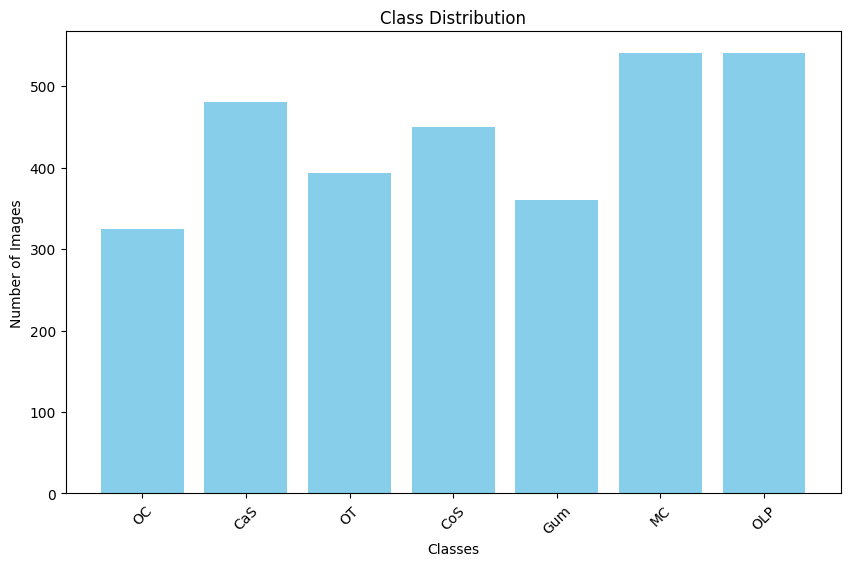

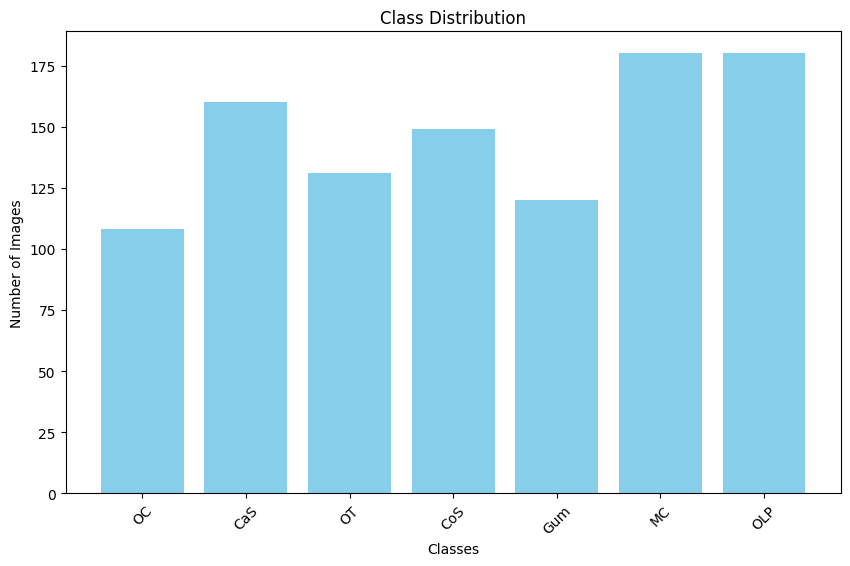

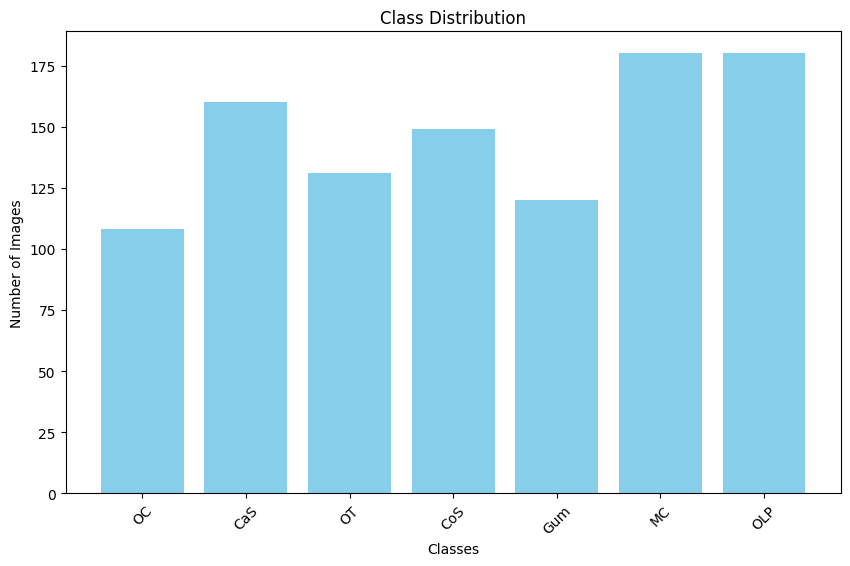

In [50]:
import matplotlib.pyplot as plt

def plot_class_distribution(directory):
    class_names = os.listdir(directory)
    class_counts = {class_name: len(os.listdir(os.path.join(directory, class_name))) for class_name in class_names}

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Plot class distribution for training, validation, and test datasets
plot_class_distribution(train_dir)
plot_class_distribution(valid_dir)
plot_class_distribution(test_dir)


In [51]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
# Improved CNN model with Batch Normalization
num_classes = 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train model without early stopping
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[reduce_lr]
)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.8885 - loss: 0.2577 - val_accuracy: 0.7646 - val_loss: 0.8395 - learning_rate: 1.0000e-05
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8912 - loss: 0.2660 - val_accuracy: 0.7617 - val_loss: 0.8458 - learning_rate: 1.0000e-05
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8817 - loss: 0.2759 - val_accuracy: 0.7656 - val_loss: 0.8283 - learning_rate: 1.0000e-05
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9121 - loss: 0.2266 - val_accuracy: 0.7607 - val_loss: 0.8345 - learning_rate: 1.0000e-05
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9122 - loss: 0.2360 - val_accuracy: 0.7607 - val_loss: 0.8361 - learning_rate: 1.0000e-05
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9044 - loss: 0.2386 - val_accuracy: 0.7597 - val_loss: 0.8364 - learning_rate: 1.0000e-05
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8830 

In [61]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7745 - loss: 0.8750
Test Accuracy: 0.7793
Test Loss: 0.8340


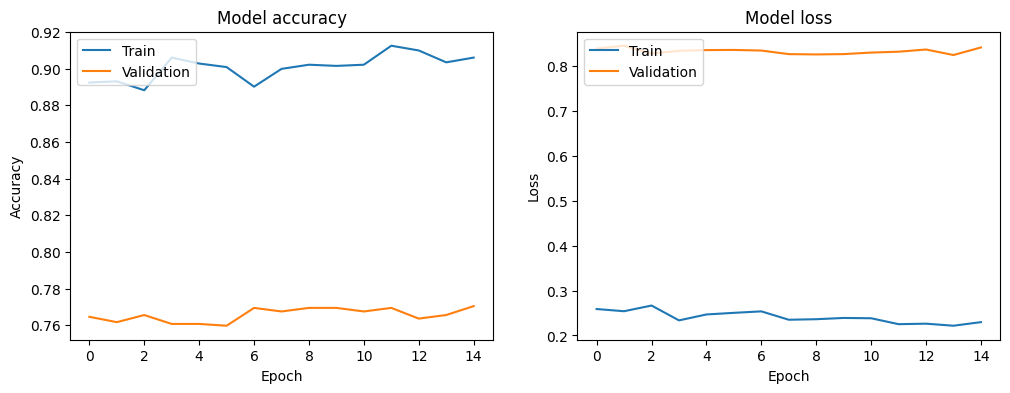

In [62]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot training history
plot_history(history)
